# Preprocessing the Absentee Data set

## Reading the data file

Loading data in the dataframe

In [1]:
import pandas as pd

Creating a file reference

In [2]:
file_path = "C:/Users/User/Documents/SQL Python and Tableau Project/Data Source/For Preprocessing/"
file_name = "Absenteeism_data.csv"
file_ref = file_path + file_name

Reading the file into Pandas DataFrame

In [3]:
raw_data_df = pd.read_csv(file_ref)

Setting up Pandas display options 

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

Displaying the dataset

In [5]:
display(raw_data_df.head(15))

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


Copying the original dataframe to preserve the original data

In [6]:
df = raw_data_df.copy()

Getting info of the data set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
ID                           700 non-null int64
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


There are no missing values in the data set. It is a very good thing. 
Next, since we are predicting absenteeism, the variable of interest is "Absenteeism Time in Hours". This variable is "dependent" variable - depending on all other variables in the dataset.

## Droping the ID column

Dropping the ID column is the next step. This column is just an identifier - representing an empployee data.

In [8]:
df = df.drop(["ID"], axis = 1)

Verifying that column has been deleted

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
Reason for Absence           700 non-null int64
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(9), object(1)
memory usage: 60.3+ KB


## Analyzing the "Reason for Absence" column

Plotting the counts for each value in the column

In [10]:
import seaborn as sns
sns.set(style = "darkgrid")

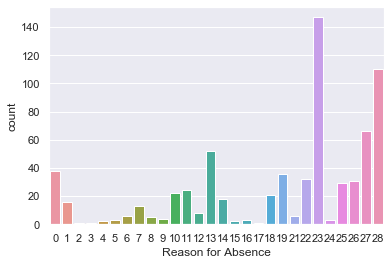

In [11]:
ax = sns.countplot( x = "Reason for Absence", data = df )

How many unique values are there

In [12]:
len(df["Reason for Absence"].unique())

28

Based on the data description, following are the descriptions of the values in this column.

**Descriptions**
* 01 = Certain infectious and parasitic diseases
* 02 = Neoplasms
* 03 = Diseases of the blood or blood-forming organs and certain disorders involving the immune mechanism
* 04 = Endocrine, nutritional and metabolic diseases
* 05 = Mental and behavioural diseases
* 06 = Diseases of the nervous system
* 07 = Diseases of the eye and adnexa
* 08 = Diseases of the ear and mastoid process
* 09 = Diseases of the circulatory system
* 10 = Diseases of the respiratory system
* 11 = Diseases of the digestive system
* 12 = Diseases of the skin and subcutaneaous tissue
* 13 = Diseases of the musculoskeletal system and connective tissue
* 14 = Diseases of the genitourinary system
* 15 = Pregnancy, childbirth and puerperium
* 16 = Certain conditions originating in the perinatal period
* 17 = Congenital malformations, deformations and chromosomal abnormalities
* 18 = Symptoms, signs and abnormal clinical and laboratory findings, not classified elsewhere
* 19 = Injury, poisoning and certain other consequences of external causes
* 20 = External causes of morbidity and mortality
* 21 = Factors influencing health status and contact with health services
* 22 = Patient follow-up
* 23 = Medical consultation
* 24 = Blood donation
* 25 = Laboratory examination
* 26 = Unjustified absence
* 27 = Physiotherapy
* 28 = Dental consultation

Creating dummy varaibles for "Reason of Absence" column

In [13]:
reason_columns = pd.get_dummies(df["Reason for Absence"])

Displaying the result

In [14]:
display(reason_columns.head(15))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Checking the sanity of the values of the data set

* each of 700 rows should have a sum of 1 - as there should be only one reason of absence
* the summed column should have a value of 700

In [15]:
reason_columns["Check"] = reason_columns.sum(axis = 1)

In [57]:
display(reason_columns.head(15))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [17]:
reason_columns["Check"].sum(axis = 0)

700

In [18]:
reason_columns["Check"].unique()

array([1], dtype=int64)

These results confirm that creating dummy variables worked.

Droping the "Check" column - it is no longer needed

In [19]:
reason_columns = reason_columns.drop( ["Check"], axis = 1 )

In [58]:
display(reason_columns.head(15))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
type(reason_columns)

pandas.core.frame.DataFrame

In [22]:
reason_columns = reason_columns.drop( [0], axis = 1 )

In [59]:
display(reason_columns.head(15))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Droping the "Reason for Absence" column in the df - we are processing dummy variables for this column so we do not need this column. If we do not remove the column, it will cause multicollinearity - an undesireable effect.

In [24]:
df = df.drop( ["Reason for Absence"], axis = 1 )

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 54.8+ KB


"Reason for Absence" column is no more in the data set

Grouping the reaons in reason_columns for simplicity
* columns 01 - 14 represent certain diseases
* columns 15 - 17 relate to reasons of pregnancy
* columns 18 - 21 relate to extrenous reasons such as poisoning
* columns 22 - 28 represent "soft" reasons

We need to store the maximum value in the reasons groups because each row should sum to 1. These columns may contain that 1. Let us create first grouping.

In [26]:
reason_group1 = reason_columns.iloc[:, 0:14]

In [27]:
display(reason_group1.head(5))

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Confirmed the columns of interest. Now we extract the maximum value

In [28]:
reason_group1 = reason_group1.max(axis = 1)

In [60]:
display(reason_group1.head(15))

0     0
1     0
2     0
3     1
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    1
12    1
13    1
14    0
dtype: uint8

Next create second grouping.

In [30]:
reason_group2 = reason_columns.iloc[:, 14:17]

In [31]:
display(reason_group2.head(5))

,15,16,17
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


Confirmed the columns. Let us extract Maximum value.

In [32]:
reason_group2 = reason_group2.max(axis = 1)

In [33]:
display(reason_group2.head(5))

0    0
1    0
2    0
3    0
4    0
dtype: uint8

Next, let us create the 3rd group.

In [61]:
reason_group3 = reason_columns.iloc[:, 17:20]
display(reason_group3.head(15))

,18,19,21
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
5,0,0,0
6,0,0,0
7,0,0,0
8,0,1,0
9,0,0,0


After confirming the columns, let us extract maximum

In [35]:
reason_group3 = reason_group3.max(axis = 1)
display(reason_group3.head(5))

0    0
1    0
2    0
3    0
4    0
dtype: uint8

Finally, creating the 4th group.

In [62]:
reason_group4 = reason_columns.iloc[:, 20:27]
display(reason_group4.head(15))

,22,23,24,25,26,27,28
0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0
5,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0
7,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0


In [37]:
reason_group4 = reason_group4.max(axis = 1)
display(reason_group4.head(5))

0    1
1    0
2    1
3    0
4    1
dtype: uint8

Combining the df and the 4 reason_groups

In [38]:
dfs_list = [df, reason_group1, reason_group2, reason_group3, reason_group4]
df = pd.concat(dfs_list, axis = 1)
display(df.head(15))

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
5,10/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
6,17/07/2015,361,52,28,239.554,27,1,1,4,8,0,0,0,1
7,24/07/2015,260,50,36,239.554,23,1,4,0,4,0,0,0,1
8,06/07/2015,155,12,34,239.554,25,1,2,0,40,0,0,1,0
9,13/07/2015,235,11,37,239.554,29,3,1,1,8,0,0,0,1


Assigning meaning full names to the new column we concatenated

In [39]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 
                'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours', 
                'Reasons_Disease', 'Reasons_Pregnancy', 'Reasons_Extrenous', 'Reasons_Soft']
df.columns = column_names
display(df.head(15))

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reasons_Disease,Reasons_Pregnancy,Reasons_Extrenous,Reasons_Soft
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
5,10/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
6,17/07/2015,361,52,28,239.554,27,1,1,4,8,0,0,0,1
7,24/07/2015,260,50,36,239.554,23,1,4,0,4,0,0,0,1
8,06/07/2015,155,12,34,239.554,25,1,2,0,40,0,0,1,0
9,13/07/2015,235,11,37,239.554,29,3,1,1,8,0,0,0,1


Reordering the columns

In [40]:
column_names_reordered = ['Reasons_Disease', 'Reasons_Pregnancy', 'Reasons_Extrenous', 'Reasons_Soft',
                          'Date', 'Transportation Expense', 'Distance to Work', 'Age', 'Daily Work Load Average', 
                          'Body Mass Index', 'Education', 'Children', 'Pets', 'Absenteeism Time in Hours']
df = df[column_names_reordered]
display(df.head(15))

,Reasons_Disease,Reasons_Pregnancy,Reasons_Extrenous,Reasons_Soft,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,0,0,0,1,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,0,0,0,1,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,0,0,0,1,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,0,0,1,0,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,0,0,0,1,13/07/2015,235,11,37,239.554,29,3,1,1,8


Saving the copy of the work so far

In [41]:
df_reason_modified = df.copy()
df_reason_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
Reasons_Disease              700 non-null uint8
Reasons_Pregnancy            700 non-null uint8
Reasons_Extrenous            700 non-null uint8
Reasons_Soft                 700 non-null uint8
Date                         700 non-null object
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: float64(1), int64(8), object(1), uint8(4)
memory usage: 57.5+ KB


## Analyzing the "Date" column

Converting the values in "Date" column to Date values as they are type string

In [42]:
df_reason_modified["Date"] = pd.to_datetime(df_reason_modified["Date"], format = "%d/%m/%Y")

Checking whether the column "Date" has been modified or not

In [43]:
display(df_reason_modified.head(15))

,Reasons_Disease,Reasons_Pregnancy,Reasons_Extrenous,Reasons_Soft,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2
5,0,0,0,1,2015-07-10,179,51,38,239.554,31,1,0,0,2
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4
8,0,0,1,0,2015-07-06,155,12,34,239.554,25,1,2,0,40
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8


Extracting months from the "Date" column - is there a particular month of the year where people are more absent like near Christmas holidays

In [44]:
list_months = []
counter_max = df_reason_modified.shape[0]
for i in range(counter_max):
    list_months.append(df_reason_modified["Date"][i].month)

Checking the list of months extracted from "Date" column

In [64]:
display(list_months)

[7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 

Checking the number of items in the list - they should be 700

In [46]:
len(list_months)

700

Assigning this list to a new column in the data frame

In [47]:
df_reason_modified["Month_Value"] = list_months
display(df_reason_modified.head(15))

,Reasons_Disease,Reasons_Pregnancy,Reasons_Extrenous,Reasons_Soft,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
5,0,0,0,1,2015-07-10,179,51,38,239.554,31,1,0,0,2,7
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8,7
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4,7
8,0,0,1,0,2015-07-06,155,12,34,239.554,25,1,2,0,40,7
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8,7


Extracting the weekday will help in identifying whether people are more absent on a particular weekday or not

In [48]:
def dayofdate_to_weekday(datevalue):
    return datevalue.weekday()

In [65]:
df_reason_modified["Weekday"] = df_reason_modified["Date"].apply(dayofdate_to_weekday)
display(df_reason_modified.head(15))

,Reasons_Disease,Reasons_Pregnancy,Reasons_Extrenous,Reasons_Soft,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_Value,Weekday
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
5,0,0,0,1,2015-07-10,179,51,38,239.554,31,1,0,0,2,7,4
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8,7,4
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4,7,4
8,0,0,1,0,2015-07-06,155,12,34,239.554,25,1,2,0,40,7,0
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8,7,0


Creating a checkpoint

In [50]:
df_reason_date_modified = df_reason_modified.copy()

## Analyzing "Transportation Expense", "Distance to Work", "Age", "Daily Work Load Average", and "Body Mass Index" columns

We are not doing any special treatment to these 5 columns. Rather, we are going to discuss their possible reasons of inclusion in the data set.

1. Transportation expense is a sub category of travel expenses. It is calculated for 30 days and it has been rounded off to an integer. It is possible that in order to cut down expenses, certain employee may be absent.
2. Distance to work is measured in kilometers from home to work. It has also been rounded to an integer. It is possible that this distance may effect the number of hours in a day an employee works at the work place.
3. Age of the employee effects the behaviour his or her behaviour. It has also been rounded to an integer.
4. Daily Work Load Average has been calculated in minutes. This number approximates to 3 to 4 hours a day on average. It is possible that higher than average work load could lead to absenteeism.
5. Body Mass Index is often indicative of health issues. It is possible that higher BMI could lead to more hospital related visits.

## Analyzing "Education" column

Understanding the unique values in "Education" column

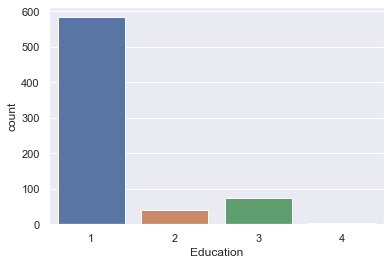

In [51]:
ax = sns.countplot ( x = "Education", data = df_reason_date_modified )

Based on the data dictionary, following are descriptions for the 4 levels of education.

**Description**
* 1 = High School
* 2 = Graduate
* 3 = Post Graduate
* 4 = Masters or Doctor

The data is so skewed towards high school education that it will be easy to create only two groups for analyzing the effects.

In [52]:
dict = {1:0, 2:1, 3:1, 4:1}
df_reason_date_modified["Education"] = df_reason_date_modified["Education"].map(dict)
display (df_reason_date_modified.head(15))

,Reasons_Disease,Reasons_Pregnancy,Reasons_Extrenous,Reasons_Soft,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_Value,Weekday
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,0,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,0,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,0,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,0,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,0,2,1,2,7,3
5,0,0,0,1,2015-07-10,179,51,38,239.554,31,0,0,0,2,7,4
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,0,1,4,8,7,4
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,0,4,0,4,7,4
8,0,0,1,0,2015-07-06,155,12,34,239.554,25,0,2,0,40,7,0
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,1,1,1,8,7,0


Checking the unique values for education after modification

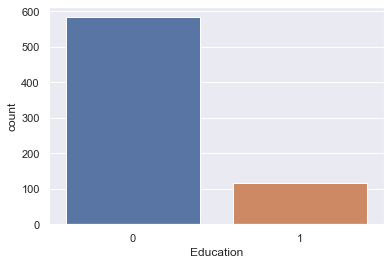

In [53]:
ax = sns.countplot( x = "Education", data = df_reason_date_modified )

## Analyzing "Children" and "Pets" columns

The values of these columns do not particulary present any numerical information. The values just are categorical variables that do not require any deeper analysis or preprocessing.

Reordering columns

In [54]:
columns_list_reordered = ['Reasons_Disease', 'Reasons_Pregnancy', 'Reasons_Extrenous',
       'Reasons_Soft', 'Date', 'Month_Value', 'Weekday', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours']
df_reason_date_modified = df_reason_date_modified[columns_list_reordered]

Creating final data set

In [55]:
df_preprocessed = df_reason_date_modified.copy()
df_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
Reasons_Disease              700 non-null uint8
Reasons_Pregnancy            700 non-null uint8
Reasons_Extrenous            700 non-null uint8
Reasons_Soft                 700 non-null uint8
Date                         700 non-null datetime64[ns]
Month_Value                  700 non-null int64
Weekday                      700 non-null int64
Transportation Expense       700 non-null int64
Distance to Work             700 non-null int64
Age                          700 non-null int64
Daily Work Load Average      700 non-null float64
Body Mass Index              700 non-null int64
Education                    700 non-null int64
Children                     700 non-null int64
Pets                         700 non-null int64
Absenteeism Time in Hours    700 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10), uint8(4)
memory usage: 68.5 KB


## Exporting preprocessed dataset for Machine Learning

In [56]:
df_preprocessed.to_csv(r"C:\Users\User\Documents\SQL Python and Tableau Project\Data Source\For Machine Learning\preprocessed_Absenteeism_data.csv",
                      header = True, 
                      index = False)

# Preprocessing finished